# Exercise 11.3

Now the aim is to extend the fit to a function with two variables $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

2023-10-07 22:21:47.230829: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-07 22:21:47.314489: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-07 22:21:47.337249: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-07 22:21:47.727985: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

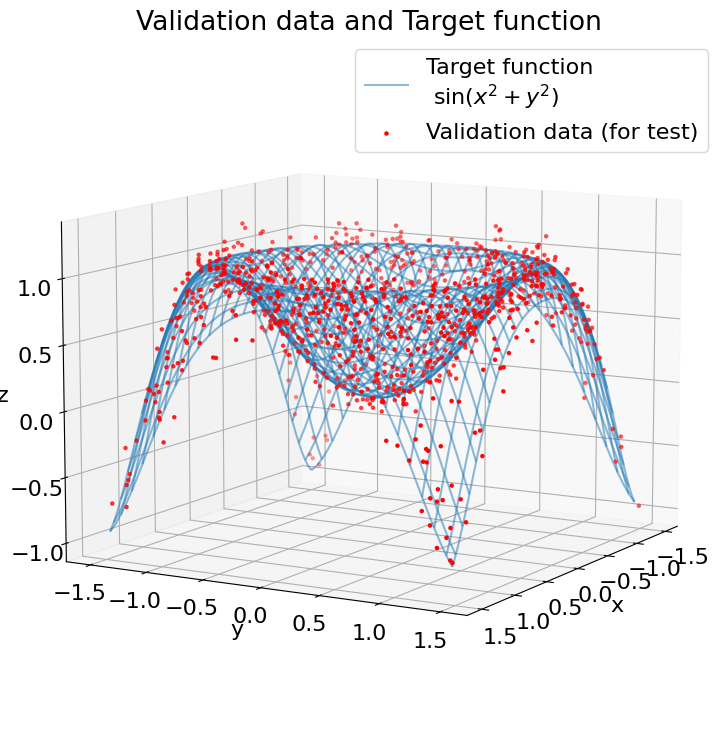

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from mpl_toolkits.mplot3d import Axes3D

# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 16})

np.random.seed(0)
x_train = np.random.uniform(-3/2, 3/2, 10000)
y_train = np.random.uniform(-3/2, 3/2, 10000)

x_valid = np.random.uniform(-3/2, 3/2, 1000)
y_valid = np.random.uniform(-3/2, 3/2, 1000)

XY_train = np.column_stack((x_train,y_train))      
XY_valid = np.column_stack((x_valid,y_valid))

#x_valid.sort()
#y_valid.sort()
z_target = np.sin(x_valid*x_valid+y_valid*y_valid) # ideal (target) cubic function

sigma = 0.1 # noise standard deviation, for the moment it is absent
z_train = np.random.normal( np.sin(x_train*x_train+y_train*y_train), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal( np.sin(x_valid*x_valid+y_valid*y_valid), sigma)

#===plot function===#

lim = 3/2

fig = plt.figure(figsize = (7,7))
ax = Axes3D(fig)
fig.add_axes(ax)

x_surf = np.arange(-lim,lim, 0.05)
y_surf = np.arange(-lim,lim, 0.05)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)
ax.plot_wireframe(  X_surf, Y_surf, np.sin(X_surf**2+Y_surf**2), 
                    rstride=2, cstride=2, 
                    label='Target function\n $\sin(x^2+y^2)$',
                    alpha = 0.5)
ax.scatter(x_valid, y_valid, z_valid, marker = ".", color = "r", label='Validation data (for test)')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Validation data and Target function")
ax.legend()
ax.view_init(10, 30)

plt.show()


In [2]:
def model():
    model = tf.keras.Sequential()
    model.add(Dense(256,'relu', input_shape=(2,)))
    model.add(Dense(128,'relu'))
    model.add(Dense(64,'relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    
   
    history = model.fit(XY_train,z_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(XY_valid, z_valid))
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    return model

Epoch 1/30


2023-10-07 22:21:51.087435: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-10-07 22:21:51.087466: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2023-10-07 22:21:51.087887: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


313/313 [==============================] - 1s 1ms/step - loss: 0.1207 - mse: 0.1207 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 2/30
313/313 [==============================] - 0s 746us/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 3/30
313/313 [==============================] - 0s 744us/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 4/30
313/313 [==============================] - 0s 733us/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 5/30
313/313 [==============================] - 0s 746us/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 6/30
313/313 [==============================] - 0s 743us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 7/30
313/313 [==============================] - 0s 736us/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 8/30
313/313 [==============================] - 0s 732us/step - loss:

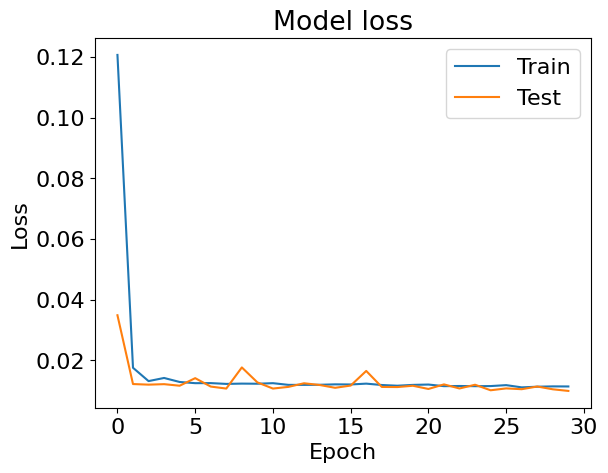

In [3]:
model = model()


32/32 [==============================] - 0s 466us/step


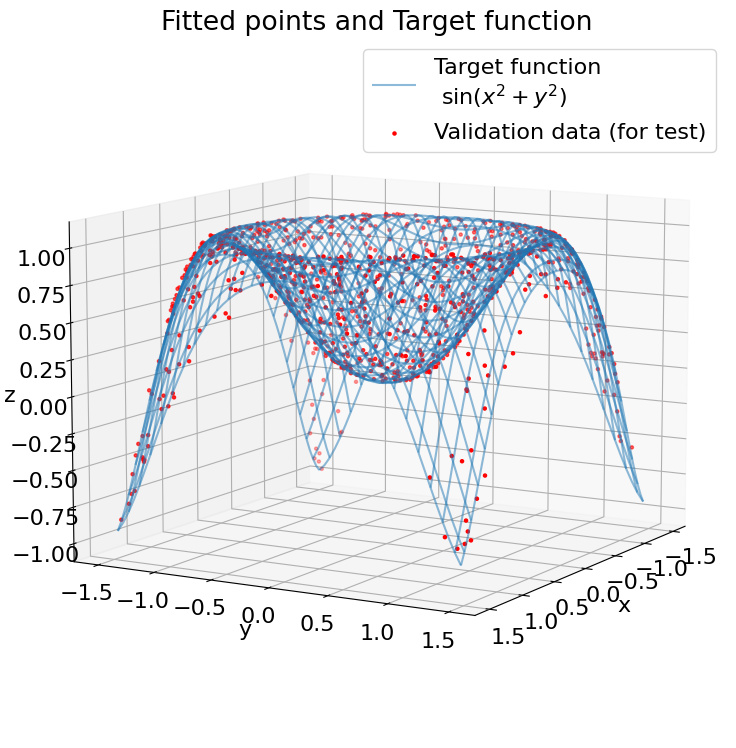

In [4]:
x_predicted = np.random.uniform(-3/2, 3/2, 1000)
y_predicted = np.random.uniform(-3/2, 3/2, 1000)
xy_predicted = np.column_stack((x_predicted,y_predicted))
z_predicted = model.predict(xy_predicted)


fig = plt.figure(figsize = (7,7))
ax = Axes3D(fig)
fig.add_axes(ax)

x_surf = np.arange(-lim,lim, 0.05)
y_surf = np.arange(-lim,lim, 0.05)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)
ax.plot_wireframe(  X_surf, Y_surf, np.sin(X_surf**2+Y_surf**2), 
                    rstride=2, cstride=2, 
                    label='Target function\n $\sin(x^2+y^2)$',
                    alpha = 0.5)
ax.scatter(x_predicted, y_predicted, z_predicted, marker = ".", color = "r", label='Validation data (for test)')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Fitted points and Target function")
ax.legend()
ax.view_init(10, 30)

plt.show()


The fit is quite good as shown in picture, now what happens outside the limit values?

32/32 [==============================] - 0s 504us/step


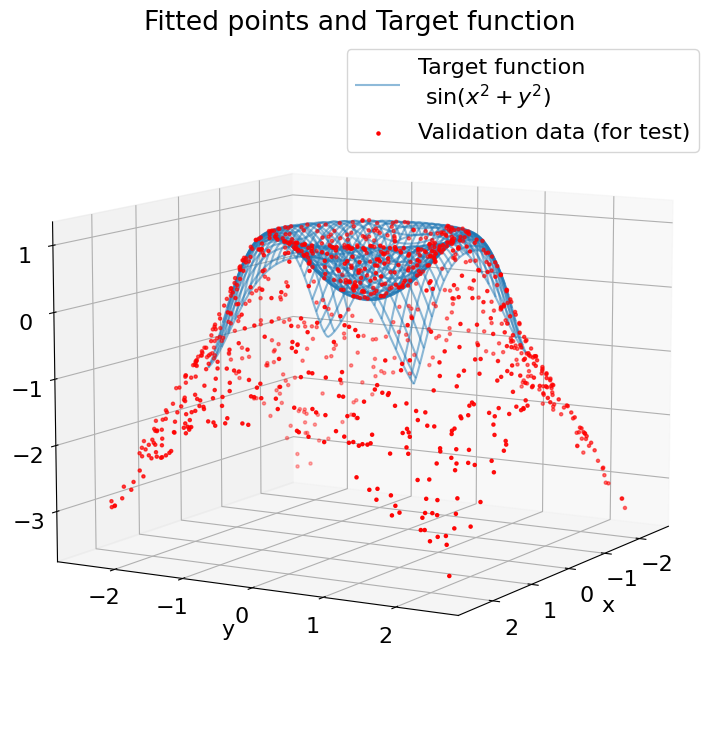

In [5]:
x_predicted = np.random.uniform(-5/2, 5/2, 1000)
y_predicted = np.random.uniform(-5/2, 5/2, 1000)
xy_predicted = np.column_stack((x_predicted,y_predicted))
z_predicted = model.predict(xy_predicted)


fig = plt.figure(figsize = (7,7))
ax = Axes3D(fig)
fig.add_axes(ax)

x_surf = np.arange(-lim,lim, 0.05)
y_surf = np.arange(-lim,lim, 0.05)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)
ax.plot_wireframe(  X_surf, Y_surf, np.sin(X_surf**2+Y_surf**2), 
                    rstride=2, cstride=2, 
                    label='Target function\n $\sin(x^2+y^2)$',
                    alpha = 0.5)
ax.scatter(x_predicted, y_predicted, z_predicted, marker = ".", color = "r", label='Validation data (for test)')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Fitted points and Target function")
ax.legend()
ax.view_init(10, 30)

plt.show()


The cumbersome task is to adapt the data to feed the model, but the behaviour of the model is similar to the one of exercise 11.2 and misbehaves outside the boundaries.